In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("..")  # Sube un nivel para acceder a los módulos
import image_loader as loader

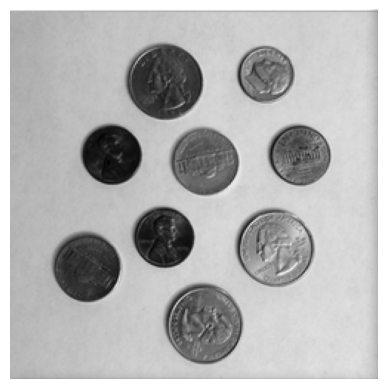

In [17]:
image_path = "../images/coins.png"
image = loader.load_image(image_path)
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray, cmap='gray')
plt.axis('off')
plt.show()

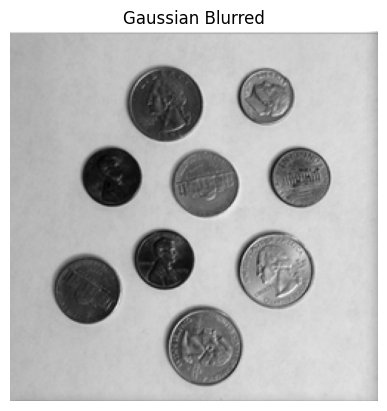

In [18]:
# blurred format
blurred = cv2.GaussianBlur(imgray, (5, 5), 0)
plt.imshow(blurred)
plt.title("Gaussian Blurred")
plt.imshow(imgray, cmap='gray')
plt.axis('off')
plt.show()

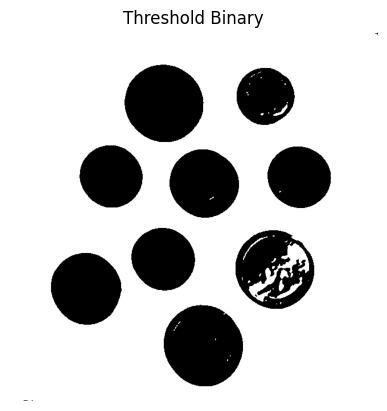

In [ ]:
(T, thresh) = cv2.threshold(blurred,  # Gray-scale source image
                            155,  # Threshold value
                            255,  # Set value 255 = withe
                            cv2.THRESH_BINARY  # Thresholding method
                            ) # -> returns T: threshold value, thresh: transformed image
plt.imshow(blurred)
plt.imshow(thresh, cmap='gray')
plt.title("Threshold Binary")
plt.axis('off')
plt.show()

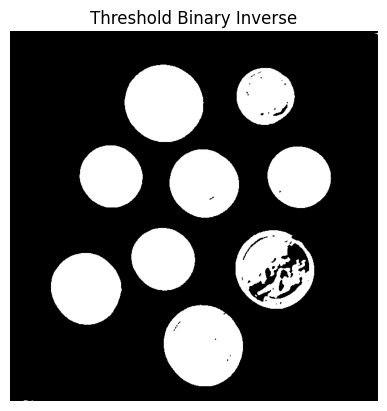

In [24]:
(T, inv_thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
plt.imshow(blurred)
plt.imshow(inv_thresh, cmap='gray')
plt.title("Threshold Binary Inverse")
plt.axis('off')
plt.show()

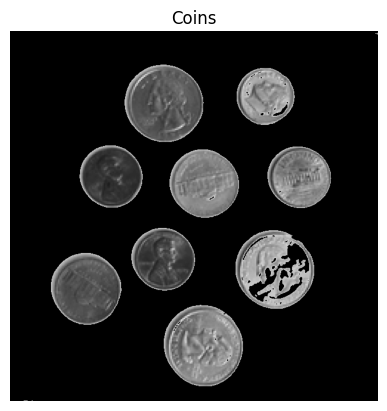

In [26]:
coins = cv2.bitwise_and(imgray, imgray, mask=inv_thresh)
plt.imshow(coins, cmap='gray')
plt.title("Coins")
plt.axis('off')
plt.show()

## Adaptative tresholding

In [ ]:
mean_thresh = cv2.adaptiveThreshold(blurred,
                               255, 
                               cv2.ADAPTIVE_THRESH_MEAN_C,  # method to compute threshold: use mean of the neithborhood at value T
                               cv2.THRESH_BINARY_INV,  # threshold method
                               11,  # neighborhood size
                               4  # value substracted from the mean
                               )
gauss_tresh = cv2.adaptiveThreshold(blurred, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, 
                                    15,
                                    3,
                                    )


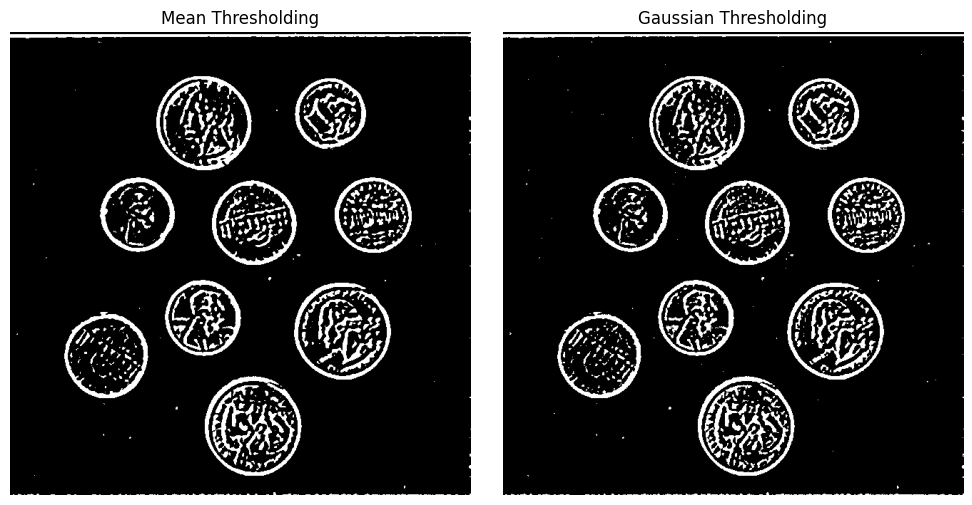

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(mean_thresh, cmap='gray')
axes[0].set_title("Mean Thresholding")
axes[0].axis('off')

axes[1].imshow(gauss_tresh, cmap='gray')
axes[1].set_title("Gaussian Thresholding")
axes[1].axis('off')
plt.tight_layout()
plt.show()